In [20]:
!pip install -q tensorflow
!pip install -q protobuf

In [21]:
import os
import zipfile
import random
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

In [22]:


base = "/kaggle/input/dogs-vs-cats-redux-kernels-edition"
print("📂 Contenu du dossier de base :", os.listdir(base))

train_zip = os.path.join(base, "train.zip")
test_zip = os.path.join(base, "test.zip")

train_extract_path = "/kaggle/working/train"
test_extract_path = "/kaggle/working/test"

# Décompression train.zip
if not os.path.exists(train_extract_path) or len(os.listdir(train_extract_path)) == 0:
    print("📦 Extraction de train.zip...")
    with zipfile.ZipFile(train_zip, 'r') as zip_ref:
        zip_ref.extractall(train_extract_path)
    print("✅ train.zip décompressé avec succès")

# Décompression test.zip
if not os.path.exists(test_extract_path) or len(os.listdir(test_extract_path)) == 0:
    print("📦 Extraction de test.zip...")
    with zipfile.ZipFile(test_zip, 'r') as zip_ref:
        zip_ref.extractall(test_extract_path)
    print("✅ test.zip décompressé avec succès")

# 🔍 Vérifie la vraie structure du dossier
print("\n📁 Contenu de /kaggle/working/train :", os.listdir(train_extract_path))
print("📁 Contenu de /kaggle/working/test :", os.listdir(test_extract_path))

# 📸 Corrige le chemin s’il y a un sous-dossier "train" à l’intérieur
if "train" in os.listdir(train_extract_path):
    train_dir = os.path.join(train_extract_path, "train")
else:
    train_dir = train_extract_path

if "test" in os.listdir(test_extract_path):
    test_dir = os.path.join(test_extract_path, "test")
else:
    test_dir = test_extract_path

# Vérification finale
print("\n📸 Exemples de fichiers dans train :", os.listdir(train_dir)[:10])
print("📸 Exemples de fichiers dans test :", os.listdir(test_dir)[:10])


📂 Contenu du dossier de base : ['sample_submission.csv', 'train.zip', 'test.zip']

📁 Contenu de /kaggle/working/train : ['train']
📁 Contenu de /kaggle/working/test : ['test']

📸 Exemples de fichiers dans train : ['dog.7974.jpg', 'dog.7366.jpg', 'dog.453.jpg', 'dog.7424.jpg', 'dog.1730.jpg', 'cat.2966.jpg', 'dog.386.jpg', 'cat.7903.jpg', 'dog.8031.jpg', 'dog.10171.jpg']
📸 Exemples de fichiers dans test : ['3645.jpg', '5636.jpg', '809.jpg', '5254.jpg', '10207.jpg', '8148.jpg', '7979.jpg', '3307.jpg', '1563.jpg', '12196.jpg']


In [23]:
noms_fichiers = os.listdir(train_dir)
noms_fichiers

['dog.7974.jpg',
 'dog.7366.jpg',
 'dog.453.jpg',
 'dog.7424.jpg',
 'dog.1730.jpg',
 'cat.2966.jpg',
 'dog.386.jpg',
 'cat.7903.jpg',
 'dog.8031.jpg',
 'dog.10171.jpg',
 'cat.6720.jpg',
 'cat.12224.jpg',
 'cat.3274.jpg',
 'cat.5421.jpg',
 'dog.6104.jpg',
 'cat.12396.jpg',
 'cat.7466.jpg',
 'cat.2537.jpg',
 'cat.12315.jpg',
 'dog.6269.jpg',
 'cat.9102.jpg',
 'dog.998.jpg',
 'dog.1465.jpg',
 'cat.9881.jpg',
 'cat.2907.jpg',
 'dog.12352.jpg',
 'cat.7497.jpg',
 'cat.3450.jpg',
 'cat.4373.jpg',
 'cat.142.jpg',
 'cat.8437.jpg',
 'cat.8874.jpg',
 'dog.7325.jpg',
 'cat.8890.jpg',
 'dog.8544.jpg',
 'dog.11093.jpg',
 'cat.5347.jpg',
 'dog.1444.jpg',
 'cat.4713.jpg',
 'dog.10109.jpg',
 'cat.11602.jpg',
 'cat.9236.jpg',
 'dog.5330.jpg',
 'cat.11216.jpg',
 'cat.1790.jpg',
 'dog.6794.jpg',
 'cat.9450.jpg',
 'dog.1403.jpg',
 'cat.7768.jpg',
 'cat.10377.jpg',
 'dog.1070.jpg',
 'dog.7176.jpg',
 'dog.11895.jpg',
 'cat.11445.jpg',
 'cat.8650.jpg',
 'dog.1650.jpg',
 'cat.10633.jpg',
 'dog.11869.jpg',
 'do

In [24]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('.')[0]
    # Vérifier si cette partie est "dog"
    if categorie == 'dog':
        # Ajouter 1 à la liste categories (indiquant que c'est une image de chien)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de chat)
        categories.append(0)

In [25]:
categories

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,


In [26]:
# creer un dataframe avec pandas

df = pd.DataFrame ({
    'filename': noms_fichiers,
    'categorie': categories
})

# Afficher le dataframe
print(df.head())

       filename  categorie
0  dog.7974.jpg          1
1  dog.7366.jpg          1
2   dog.453.jpg          1
3  dog.7424.jpg          1
4  dog.1730.jpg          1


In [27]:
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'/kaggle/working/train/train/cat.3827.jpg'

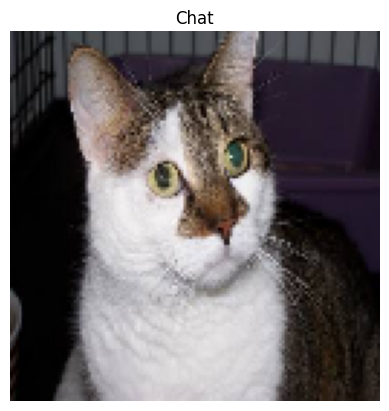

In [28]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'Chien' if 'dog' in image_aleatoire else 'Chat'
plt.title(categorie)
plt.axis('off')
plt.show()

In [29]:
# Sélectionner aléatoirement 1500 images de chats (catégorie 0)
chats_df = df[df['categorie'] == 0].sample(n=1500, random_state=42)

# Sélectionner aléatoirement 1500 images de chiens (catégorie 1)
chiens_df = df[df['categorie'] == 1].sample(n=1500, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)
df_final

,filename,categorie
0,cat.9670.jpg,0
1,cat.8331.jpg,0
2,cat.9219.jpg,0
3,cat.10417.jpg,0
4,cat.9859.jpg,0
...,...,...
2995,dog.5228.jpg,1
2996,dog.6953.jpg,1
2997,dog.4597.jpg,1
2998,dog.11804.jpg,1


In [30]:
# Initialisation de la base convolutionnelle du modèle VGG16 préentraîné.
# weights='imagenet' signifie que le modèle est préentraîné sur l'ensemble de données ImageNet, qui contient des millions d'images annotées.
# include_top=False signifie que les couches de classification dense (top layers) ne sont pas incluses,
# ce qui permet d'utiliser le modèle comme un extracteur de caractéristiques sans la dernière couche de classification.
# input_shape=(150, 150, 3) définit la taille des images d'entrée attendues par le modèle (150x150 pixels avec 3 canaux pour RGB).
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [31]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Technique sans data augmentation

In [32]:
batch_size=20

def extract_features(df, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = data_gen.flow_from_dataframe(df,
                                          filepath,
                                          x_col='filename',
                                          y_col='categorie',
                                           target_size=(150, 150),
                                           batch_size=batch_size,
                                           class_mode='binary')
  for idx, (inputs_batch, labels_batch) in enumerate(generator):
    features_batch = conv_base.predict(inputs_batch)
    features[idx * batch_size: (idx + 1) * batch_size] = features_batch
    labels[idx * batch_size: (idx + 1) * batch_size] = labels_batch
    if (idx + 1) * batch_size >= sample_count:
      break

  return features, labels

In [33]:
data_gen = ImageDataGenerator(rescale=1.0/255)

In [34]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
filepath = train_dir

In [35]:
df

,filename,categorie
0,dog.7974.jpg,1
1,dog.7366.jpg,1
2,dog.453.jpg,1
3,dog.7424.jpg,1
4,dog.1730.jpg,1
...,...,...
24995,dog.9751.jpg,1
24996,dog.11533.jpg,1
24997,dog.5783.jpg,1
24998,cat.7688.jpg,0


In [36]:
# Sélectionner aléatoirement 1500 images de chats (catégorie 0)
chats_df = df[df['categorie'] == 0].sample(n=1500, random_state=42)

# Sélectionner aléatoirement 1500 images de chiens (catégorie 1)
chiens_df = df[df['categorie'] == 1].sample(n=1500, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)
df_final


# S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['categorie'] = df_final['categorie'].astype(str)

In [37]:
# Diviser les données en ensembles d'entraînement et de test
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print(f"Taille de l'ensemble d'entraînement : {df_train.shape[0]}")
print(f"Taille de l'ensemble de test : {df_test.shape[0]}")

Taille de l'ensemble d'entraînement : 2400
Taille de l'ensemble de test : 600


In [38]:
train_features, train_labels = extract_features(df_train, 2000)

Found 2400 validated image filenames belonging to 2 classes.


I0000 00:00:1762690872.251868     121 service.cc:148] XLA service 0x7ea270045270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762690872.252439     121 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762690872.370809     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1762690875.838098     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

In [39]:
val_features, val_labels = extract_features(df_test, 600)
test_features, test_labels = val_features, val_labels

Found 600 validated image filenames belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [40]:
# Aplatir les caractéristiques
train_features = train_features.reshape((2000, 4 * 4 * 512))
# Aplatir les caractéristiques

val_features = val_features.reshape((600, 4 * 4 * 512))


# Construire et compiler le modèle de classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,097,665 (8.00 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(val_features, val_labels))

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6046 - loss: 0.6842 - val_accuracy: 0.8183 - val_loss: 0.4322
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7596 - loss: 0.4677 - val_accuracy: 0.8467 - val_loss: 0.3562
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.3564 - val_accuracy: 0.8500 - val_loss: 0.3376
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3292 - val_accuracy: 0.8800 - val_loss: 0.2996
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3116 - val_accuracy: 0.8750 - val_loss: 0.2877
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.2727 - val_accuracy: 0.8850 - val_loss: 0.2757
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.2355 - val_accuracy: 0.8850 - val_loss: 0.2774
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2274 - val_accuracy: 0.

In [42]:

val_features = val_features.reshape((600, 4 * 4 * 512))


# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(val_features, val_labels)
print(f'Test accuracy: {test_acc:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9032 - loss: 0.2551
Test accuracy: 0.90


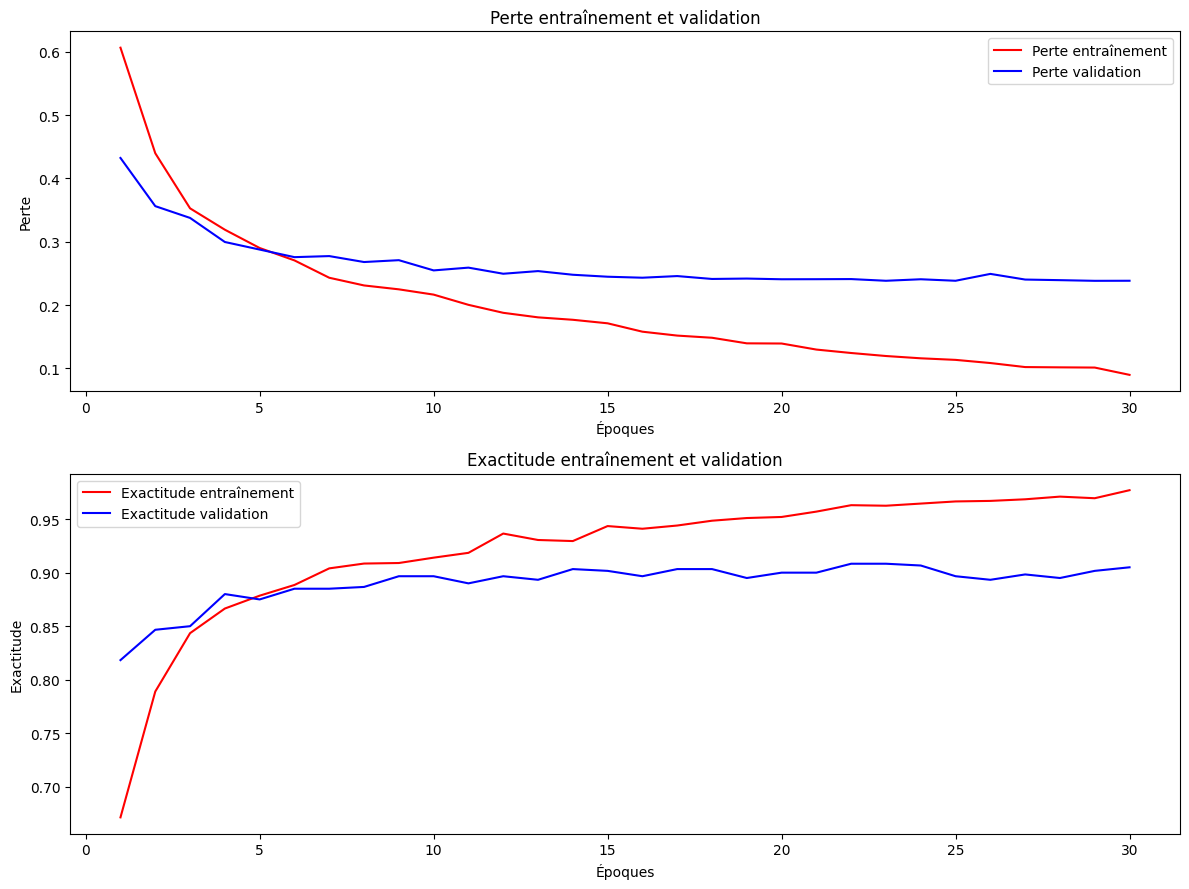

In [44]:
# Tracer les courbes d'apprentissage pour l'entraînement et la validation
history_dict = history.history

# Récupérer les valeurs de perte et d'exactitude pour chaque époque
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)



# Tracer la courbe de la perte d'entraînement et de validation
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs, loss_values, 'r-', label='Perte entraînement')  # Rouge pour la perte d'entraînement
plt.plot(epochs, val_loss_values, 'b-', label='Perte validation')  # Bleu pour la perte de validation
plt.title('Perte entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Tracer la courbe de l'exactitude d'entraînement et de validation
plt.subplot(2, 1, 2)
plt.plot(epochs, acc_values, 'r-', label='Exactitude entraînement')  # Rouge pour l'exactitude d'entraînement
plt.plot(epochs, val_acc_values, 'b-', label='Exactitude validation')  # Bleu pour l'exactitude de validation
plt.title('Exactitude entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()

plt.tight_layout()
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


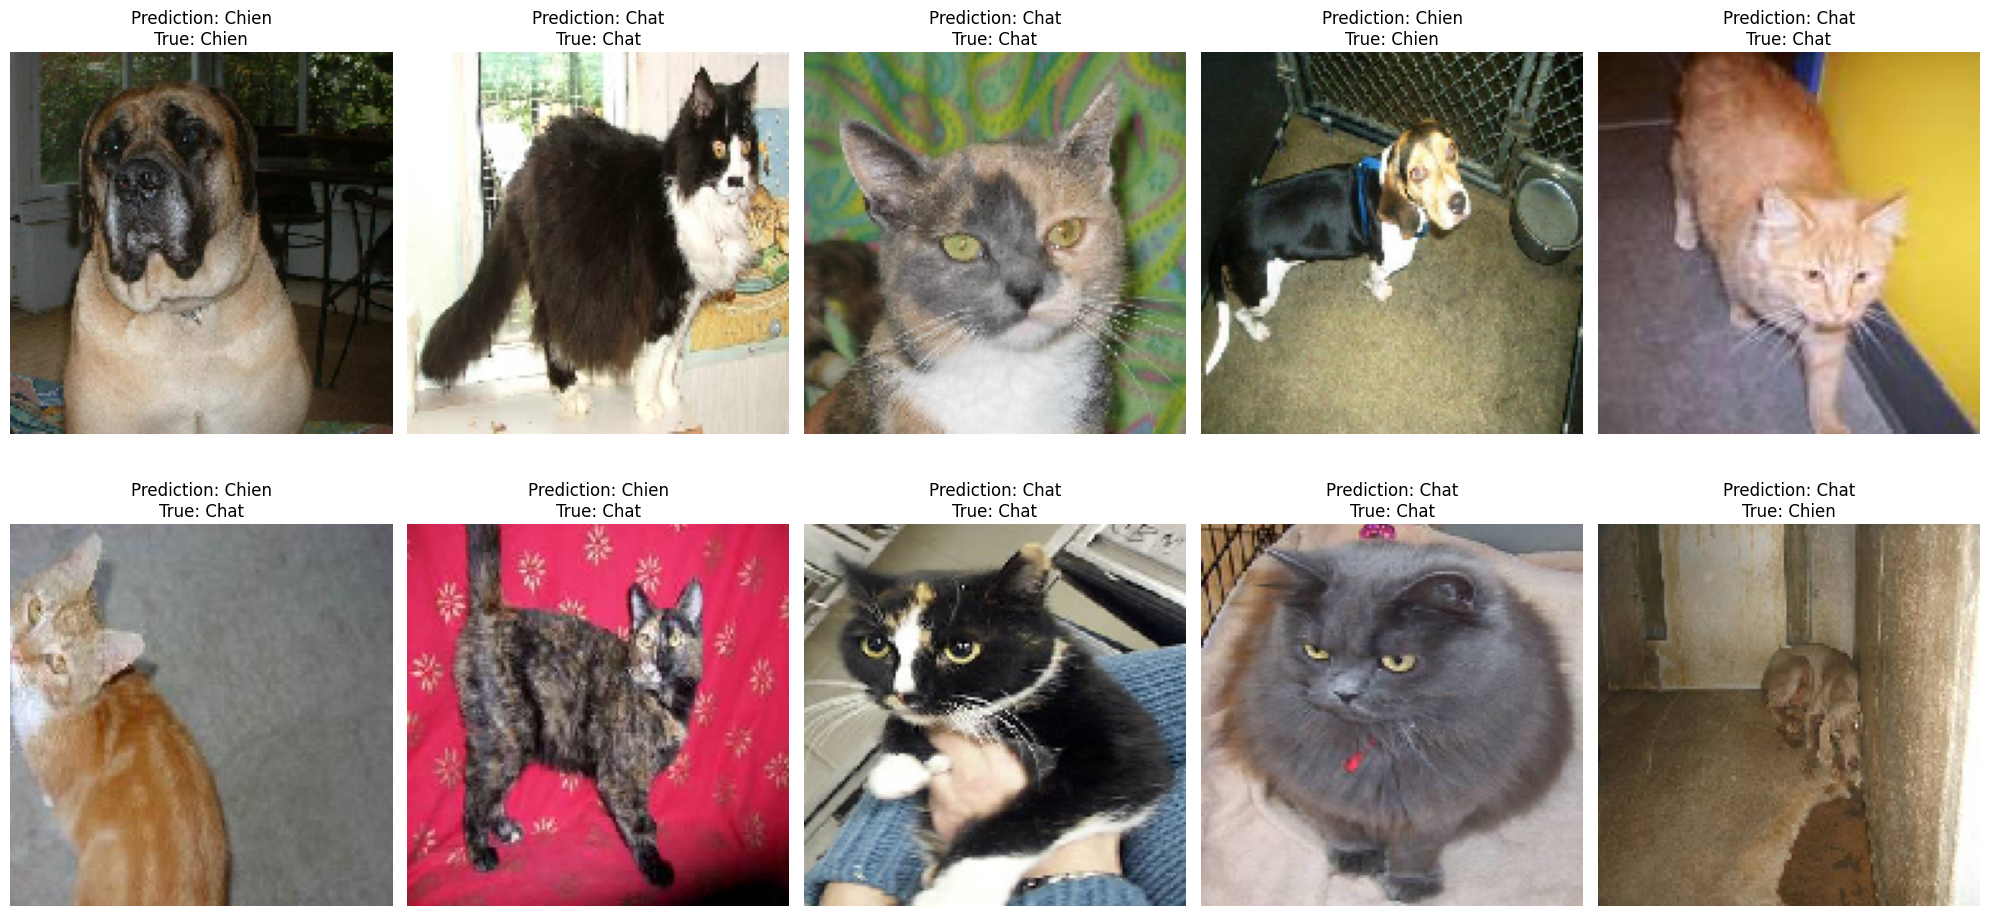

In [45]:
# Définir le chemin de base des fichiers d'image
base_path = train_dir

# Sélectionner 10 lignes aléatoires du DataFrame
df_sample = df.sample(n=10)
filenames = df_sample['filename'].tolist()
categories = df_sample['categorie'].tolist()

# Préparer les images
def prepare_image(file):
    img = load_img(file, target_size=(150, 150))  # Charger l'image et redimensionner
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Charger et préparer toutes les images
chemins_images = [f"{base_path}/{filename}" for filename in filenames]
images = np.vstack([prepare_image(chemin) for chemin in chemins_images])

# Extraire les caractéristiques avec la base convolutionnelle
features = conv_base.predict(images)

# Aplatir les caractéristiques
features_flatten = features.reshape((features.shape[0], 4 * 4 * 512))

# Faire des prédictions
predictions = model.predict(features_flatten)

# Afficher les images et les prédictions
plt.figure(figsize=(20, 10))
for i, (chemin, categorie) in enumerate(zip(chemins_images, categories)):
    img = load_img(chemin, target_size=(150, 150))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    pred_label = 'Chien' if predictions[i] > 0.5 else 'Chat'
    vrai_label = 'Chien' if categorie == 1 else 'Chat'
    plt.title(f"Prediction: {pred_label}\nTrue: {vrai_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()



## Technique avec Data Augmentation

In [46]:

# Geler les poids des couches convolutives pour éviter de les entraîner à nouveau
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [48]:

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])  # Compiler le modèle avec l'optimiseur RMSprop et la perte binaire


In [49]:
# Initialiser les générateurs de données pour l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
# Initialiser les générateurs de données pour l'augmentation des données
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col='filename',
    y_col='categorie',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=train_dir,
    x_col='filename',
    y_col='categorie',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2400 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.


In [54]:
# Entraîner le modèle
history = model.fit(train_generator,
                    epochs=30,
                    batch_size=100,
                    validation_data=validation_generator)  # Entraîner le modèle avec les caractéristiques extraites


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.8334 - loss: 0.3802 - val_accuracy: 0.8900 - val_loss: 0.2876
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.8476 - loss: 0.3621 - val_accuracy: 0.9017 - val_loss: 0.2763
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.8479 - loss: 0.3524 - val_accuracy: 0.8750 - val_loss: 0.2890
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.8349 - loss: 0.3461 - val_accuracy: 0.8833 - val_loss: 0.2752
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.8505 - loss: 0.3502 - val_accuracy: 0.8983 - val_loss: 0.2651
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.8643 - loss: 0.3290 - val_accuracy: 0.8983 - val_loss: 0.2619
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.8461 - loss: 0.3421 - val_accuracy: 0.8933 - val_loss: 0.2596
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.8573 - loss: 0.3423 - val_accu

In [55]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8881 - loss: 0.2537
Test accuracy: 0.90


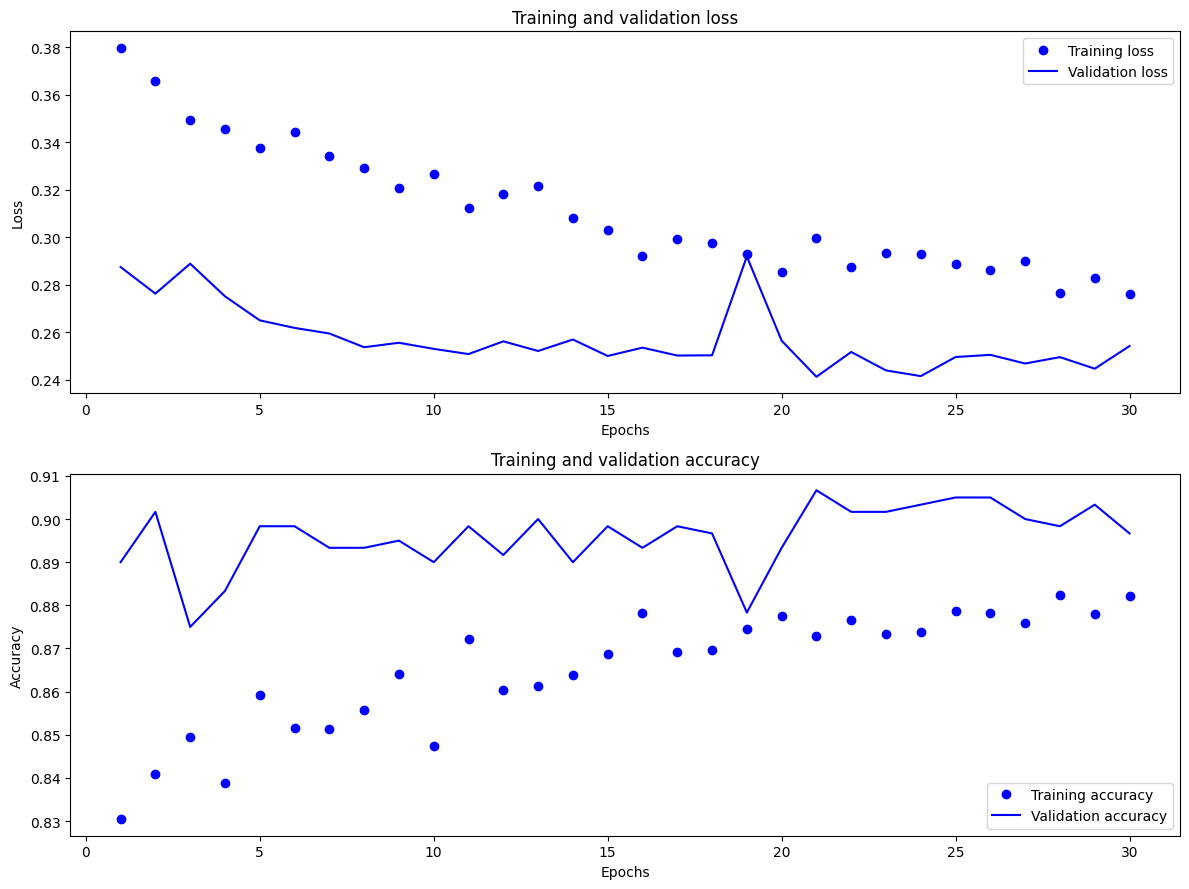

In [56]:
# Tracer les courbes d'apprentissage pour l'entraînement et la validation
history_dict = history.history

# Récupérer les valeurs de perte et d'exactitude pour chaque époque
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Tracer la courbe de la perte d'entraînement et de validation
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la courbe de l'exactitude d'entraînement et de validation
plt.subplot(2, 1, 2)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()